In [1]:
import os
from os import listdir
from os.path import isfile, join
import struct
import random
import operator
import gzip
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
mypath= r'C:\Users\dwijj\Downloads\chsi_dataset'
os.chdir(mypath)
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles

['CHSI DataSet.xls',
 'CSV File Index.txt',
 'DATAELEMENTDESCRIPTION.csv',
 'DEFINEDDATAVALUE.csv',
 'DEMOGRAPHICS.csv',
 'HEALTHYPEOPLE2010.csv',
 'LEADINGCAUSESOFDEATH.csv',
 'MEASURESOFBIRTHANDDEATH.csv',
 'MEASURESOFBIRTHANDDEATH.ipynb',
 'PREVENTIVESERVICESUSE.csv',
 'RELATIVEHEALTHIMPORTANCE.csv',
 'RISKFACTORSANDACCESSTOCARE.csv',
 'SUMMARYMEASURESOFHEALTH.csv',
 'VUNERABLEPOPSANDENVHEALTH.csv']

In [34]:
df_mbd = pd.read_csv('MEASURESOFBIRTHANDDEATH.csv')
df_mbd = df_mbd[['State_FIPS_Code','County_FIPS_Code','CHSI_County_Name','CHSI_State_Abbr','CHSI_State_Name','LBW','Premature','Under_18','Over_40','Unmarried','Late_Care','Infant_Mortality','IM_Wh_Non_Hisp','IM_Bl_Non_Hisp','IM_Hisp','IM_Neonatal','IM_Postneonatal','Total_Births','Total_Deaths','Brst_Cancer','Col_Cancer','CHD','Homicide','Lung_Cancer','MVA','Stroke','Suicide','Injury','CI_Min_Suicide']]
ListofNans = [-9999,-2222,-2222.2,-2,-1111,-1,-9998.9,-1111.10000]
df_mbd=df_mbd.replace([i for i in ListofNans], np.NAN)
df_mbd.head()

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Abbr,CHSI_State_Name,LBW,Premature,Under_18,Over_40,Unmarried,...,Brst_Cancer,Col_Cancer,CHD,Homicide,Lung_Cancer,MVA,Stroke,Suicide,Injury,CI_Min_Suicide
0,1,1,Autauga,AL,Alabama,8.1,14.3,5.1,1.4,28.0,...,34.1,15.9,172.4,6.7,65.3,27.3,73.9,16.6,23.0,11.7
1,1,3,Baldwin,AL,Alabama,8.6,15.3,4.3,1.9,25.4,...,22.5,15.3,156.5,5.4,62.1,25.1,48.7,14.3,30.1,11.0
2,1,5,Barbour,AL,Alabama,11.0,16.7,7.7,1.1,50.2,...,30.5,23.4,95.3,11.8,70.6,26.2,84.5,10.3,29.6,5.7
3,1,7,Bibb,AL,Alabama,8.7,13.7,6.5,0.9,30.2,...,30.1,17.4,184.7,8.0,64.6,35.4,144.6,14.8,30.0,9.9
4,1,9,Blount,AL,Alabama,7.6,12.8,5.0,1.3,19.3,...,30.2,16.8,148.2,5.3,71.7,27.4,47.3,14.4,24.4,10.1


Granularity: Every record in the dataframe is record of one county in the US

In [35]:
BirthStats = df_mbd['Total_Births'].describe()
DeathStats = df_mbd['Total_Deaths'].describe()
print("Births Across Counties Stats\n", BirthStats,"\n\n")
print("Deaths Across Counties Stats\n", DeathStats)

Births Across Counties Stats
 count      3140.000000
mean       4838.878344
std       13754.598791
min           2.000000
25%        1319.750000
50%        2283.000000
75%        3936.000000
max      457033.000000
Name: Total_Births, dtype: float64 


Deaths Across Counties Stats
 count      3140.000000
mean       3107.701592
std        6432.756342
min           5.000000
25%        1164.000000
50%        1887.000000
75%        2858.250000
max      181018.000000
Name: Total_Deaths, dtype: float64


In [36]:
Races_df = df_mbd[['IM_Wh_Non_Hisp','IM_Bl_Non_Hisp','IM_Hisp']]
Races_df.rename(columns = {'IM_Wh_Non_Hisp':'White', 'IM_Bl_Non_Hisp':'Black','IM_Hisp':'Hispanic'}, inplace = True) 
print("Races \n\n", Races_df.describe())

Races 

              White       Black    Hispanic
count  2712.000000  858.000000  618.000000
mean      6.580531   14.835548    6.377832
std       2.604574    5.790628    3.485414
min       0.000000    1.500000    0.000000
25%       5.000000   11.100000    4.100000
50%       6.300000   14.400000    5.900000
75%       7.900000   17.300000    7.775000
max      24.600000   55.600000   24.600000


Infant Mortality is the strongest over hispanic, then comes white, and then comes black genes

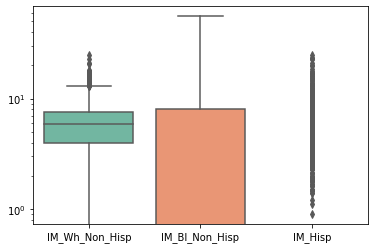

In [5]:
ax = sns.boxplot(data=df_mbd[['IM_Wh_Non_Hisp','IM_Bl_Non_Hisp','IM_Hisp']], palette="Set2")
ax.set_yscale('log')

Mother with babies whose age is either under 18 or over 4o shows that both have more chances of mortality rate of their children

In [37]:
AgeBorn = df_mbd[['Under_18','Over_40']]
print("Age Groups \n",AgeBorn.describe())

Age Groups 
           Under_18      Over_40
count  3062.000000  3011.000000
mean      4.750131     1.742976
std       2.291837     0.914043
min       0.300000     0.200000
25%       3.000000     1.100000
50%       4.400000     1.500000
75%       6.000000     2.100000
max      14.500000     9.100000


In [40]:
Race_Age = df_mbd[['IM_Wh_Non_Hisp','IM_Bl_Non_Hisp','IM_Hisp','Under_18','Over_40']]
Race_AgeCorr = pd.DataFrame(Race_Age.corr())
Race_AgeCorr = Race_AgeCorr[Race_AgeCorr.index.isin(['IM_Wh_Non_Hisp','IM_Bl_Non_Hisp','IM_Hisp'])]
Race_AgeCorr = Race_AgeCorr[['Under_18','Over_40']]
print(Race_AgeCorr)

                Under_18   Over_40
IM_Wh_Non_Hisp  0.280604 -0.278369
IM_Bl_Non_Hisp  0.073517 -0.178707
IM_Hisp         0.051379 -0.136454


The table represents the correlation values among the features. We see races except white to be negatively correlated with the age groups of Under 18 and Over 40

This means that counties in which both age groups resides have less blacks and hispanics mothers getting pregnant whose age is under 18. hence they are negatively correlated to the age groups.
In conclusion: white race has more chances of getting pregnant than hispanics and blacks. 

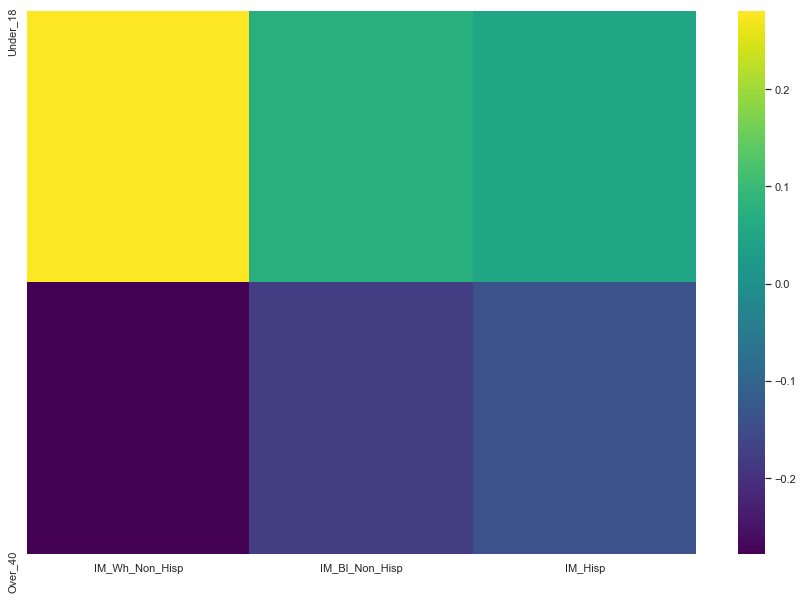

In [39]:
ax = sns.heatmap(Race_AgeCorr.transpose(),cmap='viridis')

Death Percentage in Numbers are shown below in the Graph over the Country which shows which state has more deaths

Text(0.5, 1.0, 'Death Percentage across States(Averaged Over Counties)')

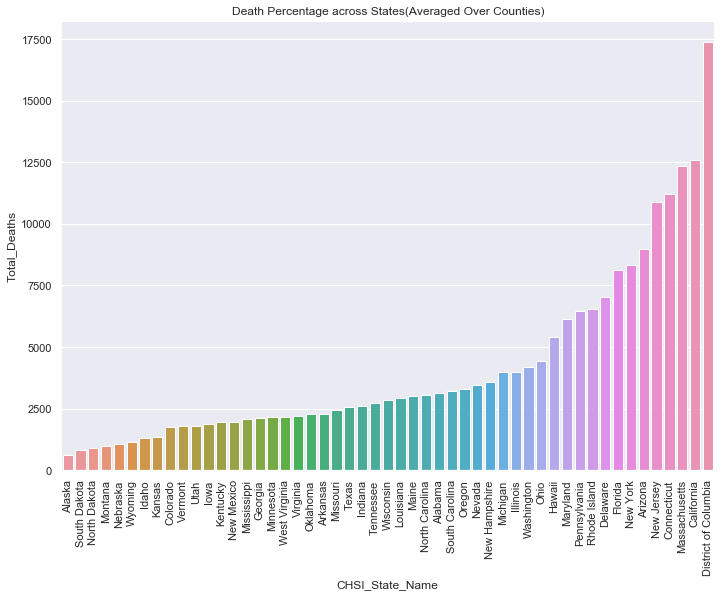

In [9]:
DeathDF = df_mbd[['Total_Deaths']].groupby(df_mbd['CHSI_State_Name']).mean().sort_values(by=['Total_Deaths'])
sns.set(rc={'figure.figsize':(11.7,8.27)})
chart = sns.barplot(x=DeathDF.index, y='Total_Deaths', data=DeathDF)
plt.xticks(rotation=90)
plt.title('Death Percentage across States(Averaged Over Counties)')

Birth Percentage in Numbers are shown below in the Graph over the Country which shows which state has more births

Text(0.5, 1.0, 'Birth Percentage across States(Averaged Over Counties)')

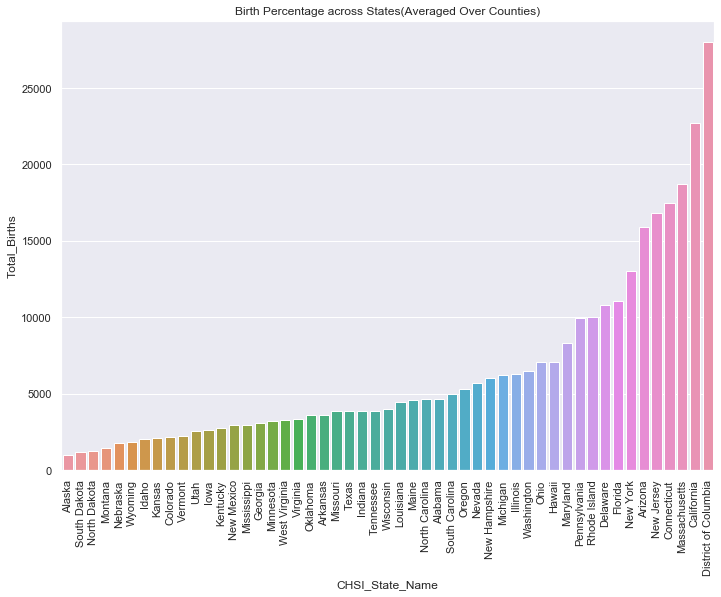

In [10]:
BirthDF = df_mbd[['Total_Births']].groupby(df_mbd['CHSI_State_Name']).mean().sort_values(by=['Total_Births'])
sns.set(rc={'figure.figsize':(11.7,8.27)})
chart = sns.barplot(x=DeathDF.index, y='Total_Births', data=BirthDF)
plt.xticks(rotation=90)
plt.title('Birth Percentage across States(Averaged Over Counties)')

Different Causes of Death which is related to our data

In [41]:
DReason_df = df_mbd[['Brst_Cancer','Col_Cancer','CHD','Homicide','Lung_Cancer','MVA','Stroke','Suicide','Injury']]
print("Death Types \n", DReason_df.describe())

Death Types 
        Brst_Cancer   Col_Cancer          CHD     Homicide  Lung_Cancer  \
count  2750.000000  2916.000000  3122.000000  1208.000000   3063.00000   
mean     26.325236    21.354870   191.066496     7.623675     58.63983   
std       5.845011     4.673957    48.273544     4.842897     14.45984   
min       9.500000     9.000000    59.800000     0.700000     10.50000   
25%      22.600000    18.100000   156.900000     4.400000     49.30000   
50%      25.800000    20.900000   187.400000     6.500000     58.40000   
75%      29.500000    24.000000   221.575000     9.600000     67.85000   
max      62.300000    46.300000   412.900000    46.000000    166.40000   

               MVA       Stroke      Suicide       Injury  
count  2960.000000  3074.000000  2618.000000  2957.000000  
mean     25.879527    63.388484    13.544843    24.692459  
std      11.866271    15.901792     5.328337     9.407172  
min       3.900000    21.600000     4.500000     9.000000  
25%      17.700000 

In [42]:
Death_Reason = df_mbd[['IM_Wh_Non_Hisp','IM_Bl_Non_Hisp','IM_Hisp','Brst_Cancer','Col_Cancer','CHD','Homicide','Lung_Cancer','MVA','Stroke','Suicide','Injury']]
Death_ReasonCorr = pd.DataFrame(Death_Reason.corr())
Death_ReasonCorr = Death_ReasonCorr[Death_ReasonCorr.index.isin(['IM_Wh_Non_Hisp','IM_Bl_Non_Hisp','IM_Hisp'])]
Death_ReasonCorr = Death_ReasonCorr[['Brst_Cancer','Col_Cancer','CHD','Homicide','Lung_Cancer','MVA','Stroke','Suicide','Injury']]
print(Death_ReasonCorr)

                Brst_Cancer  Col_Cancer       CHD  Homicide  Lung_Cancer  \
IM_Wh_Non_Hisp     0.036162    0.087951  0.193010  0.195028     0.208724   
IM_Bl_Non_Hisp    -0.039616    0.014718  0.108016  0.052221     0.148257   
IM_Hisp            0.122107    0.064680  0.072033  0.083570     0.071114   

                     MVA    Stroke   Suicide    Injury  
IM_Wh_Non_Hisp  0.246505  0.117336  0.155021  0.202378  
IM_Bl_Non_Hisp  0.093742  0.053821  0.158443  0.093347  
IM_Hisp         0.068416  0.071006  0.049346  0.090555  


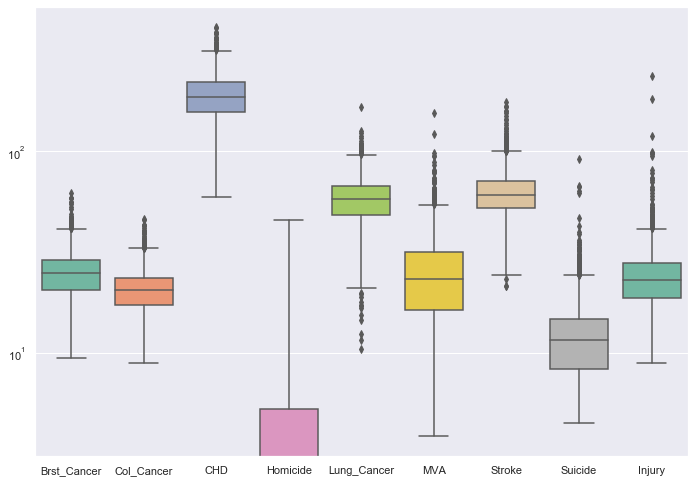

In [13]:
ax = sns.boxplot(data=df_mbd[['Brst_Cancer','Col_Cancer','CHD','Homicide','Lung_Cancer','MVA','Stroke','Suicide','Injury']], palette="Set2")
ax.set_yscale('log')

Leading Causes of Death in order is: CHD(Cardiovascular Heart Disease), Lung Cancer, Stroke, MVA(motor vehicle accidents), Breast Cancer, Injury, Colon Cancer, Suicide, and then at last Homicide this is correlated to the data over the states and deaths and negatively related to births 

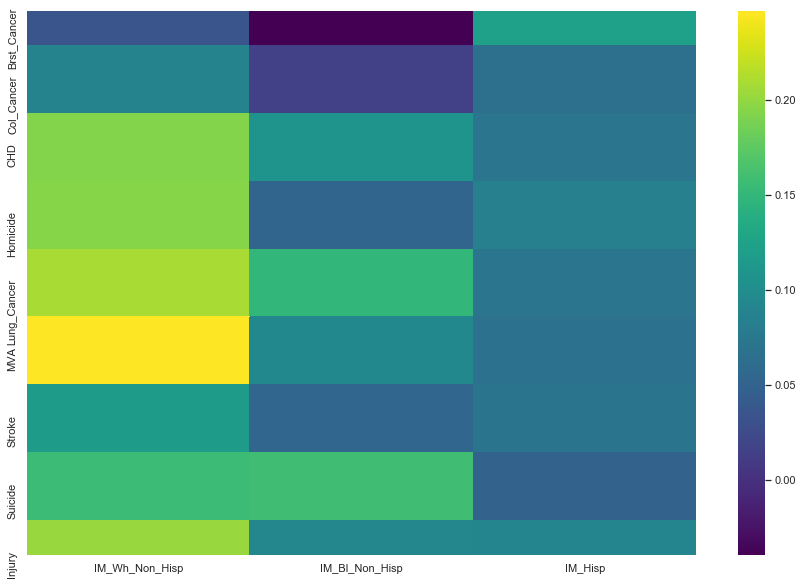

In [43]:
ax = sns.heatmap(Death_ReasonCorr.transpose(), cmap='viridis')

Data Cleaning:
    The dataset is huge and I picked measures of birth and death in the united states to study. There are almost 100 columns in this file alone, so I chose to use average columns given to do the visulization and do EDA to study accurately how these factors affect the healthcare of human beings living in this country. Therefore, study between different races, ages, and different causes were chosen as primary focus from this data file to create measure of birth and death.

Conclusion: We see from the boxplot of leading causes of deaths in the United States is CHD. Some might think that it's going to be homicide or suicide, but after looking at visulization we see that it's not the fact and actually average American die of CHD dieases. Also, looking at the birth data, women under age of 18 has higher chances of getting pregnant than women who are over 40. The white race is getting more pregnancy than other races which can be seen through the data (for women under the age of 18). Also, mortality rate over hispanic women's kids is higher.

Hardest Part of the Project: The hardest part of this project was coming from no background in data analysis. It was challenging since this is something unique and doesn't focus more on development side but rather developing models to study data. These datasets are huge and if I didn't have guidence like Varun or my teammates, it would be a lot challenging to understaand. After you understand your data, most difficult part is to understand your audience and how they will interpret your data because that's the end goal and therefore you want to make sure that it is readable. Creating graphs is the most simplest way to tackle that. It is fun to do it in team rather doing it alone.